In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## AIM DATA

In [2]:
aim = pd.read_csv('data_20211121_prototype/Kiki_21_Generic testing_a_0579.csv', skiprows=19, names=["Time","Distance","ECU_RPM","ECU_TPS","ECU_VEH_SPD","ECU_ENG_T","ECU_OIL_P","ECU_V_BATT","ECU_LAMBDA1","ECU_BRK_P"], encoding='iso-8859-1', index_col=False)

In [3]:
laps = aim[aim.Time == 0][1:].index.values
for k in range(len(laps)):
    if k+1 == len(laps):
        end_index = aim.index.values[-1]
    else:
        end_index = laps[k+1]-1
    aim['Time'].loc[laps[k]:end_index] = aim['Time'].loc[laps[k]:end_index] + aim['Time'].loc[laps[k]-1]

## LOGGER DATA

In [4]:
logger = pd.read_csv('data_20211121_prototype/Suzuki-21_20211121_153611.csv', skiprows=17, names=["Time","Distance","ECU_LAMBDA1","ECU_TPS","ECU_ENG_T","ECU_V_BATT","ECU_RPM","ECU_VEH_SPD","ECU_OIL_P","ECU_BRK_P"], encoding='iso-8859-1', index_col=False)
logger.Time -= 1.3
logger.ECU_BRK_P = logger.ECU_BRK_P * 100

## COMPARE

In [5]:
params = ["ECU_RPM", "ECU_VEH_SPD", "ECU_TPS", "ECU_BRK_P", "ECU_ENG_T", "ECU_OIL_P", "ECU_V_BATT", "ECU_LAMBDA1"]

In [ ]:
sub_aim = aim.loc[laps[0]:laps[1]]
sub_logger = logger[(logger.Time >= sub_aim.Time.iloc[0]) & (logger.Time <= sub_aim.Time.iloc[-1])]

In [6]:
sub_aim = aim
sub_logger = logger

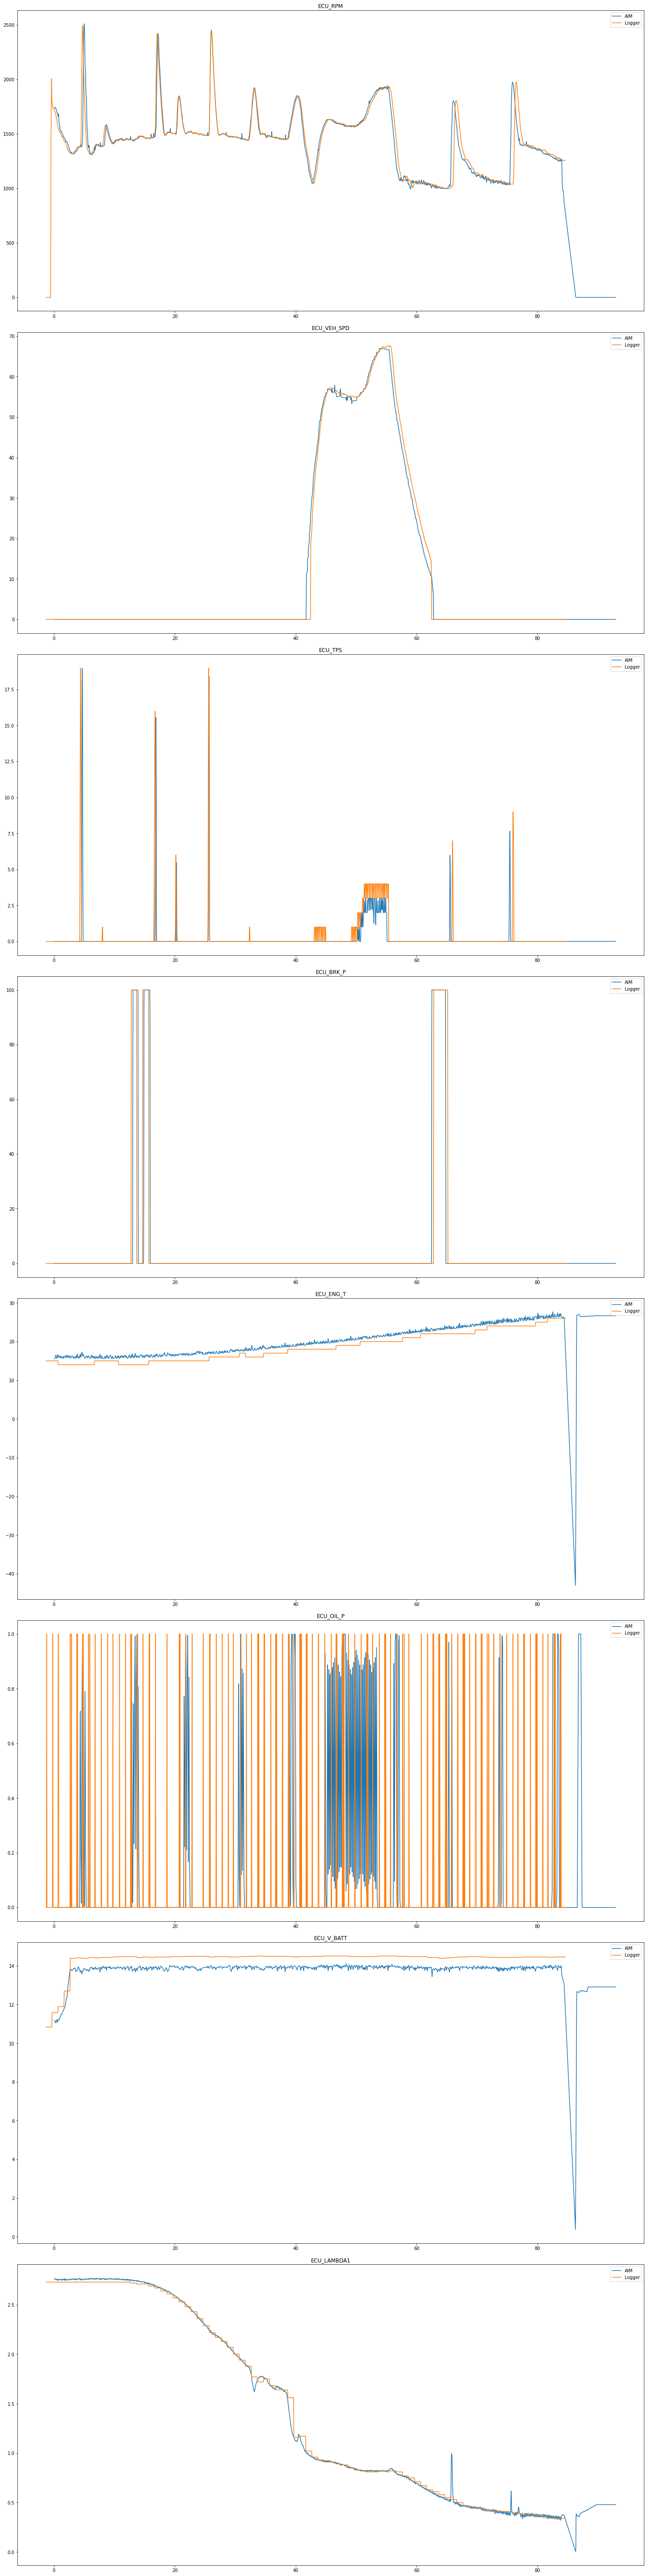

In [9]:
fig, axs = plt.subplots(8,1,figsize=(20,80), facecolor='white', constrained_layout = True)
for idx, p in enumerate(params):
    axs[idx].set_title(p)
    axs[idx].plot(sub_aim['Time'], sub_aim[p], label = 'AIM')
    axs[idx].plot(sub_logger['Time'], sub_logger[p], label = 'Logger')
    axs[idx].legend()
fig.savefig("AiM_vs_Logger_prototype.png")